In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

c:\python\python382\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\python\python382\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\python\python382\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [3]:
df= pd.read_csv('data.csv')


In [4]:
df.describe()

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,8.6_1,8.6_2,8.6_3,8.6_4,8.6_5,8.6_6,8.6_7,8.6_7_TEXT,8.7,9.1
count,277,277,277,277,277,277,277,277,277,2,...,190,189,155,194,182,171,17,12,199,75
unique,276,276,4,262,20,241,4,276,277,2,...,5,5,5,5,5,5,5,11,7,73
top,2022-12-18 17:16:13,2022-12-18 18:22:56,IP Address,95.183.240.91,100,18,True,2022-12-25 18:22:57,Response ID,Recipient Last Name,...,Sometimes problematic\t,Not problematic\t,Always problematic\t,Sometimes problematic\t,Sometimes problematic\t,Sometimes problematic\t,Always problematic\t,Racism,Somewhat satisfied,No
freq,2,2,273,4,210,4,210,2,1,1,...,79,84,88,97,75,79,9,2,132,3


In [5]:
df.dtypes

StartDate     object
EndDate       object
Status        object
IPAddress     object
Progress      object
               ...  
8.6_6         object
8.6_7         object
8.6_7_TEXT    object
8.7           object
9.1           object
Length: 108, dtype: object

In [6]:

df = df.rename(columns=df.iloc[0]).loc[1:]

In [7]:

df.drop(list(df.columns)[:18], axis=1, inplace=True)
df=df.drop(1)


In [8]:
df['2.4   How old are you?'] = pd.to_numeric(df['2.4   How old are you?'])

In [9]:

pd.set_option('display.max_rows', None)
df.isnull().sum(axis = 0)

1.1   I am/was an international student at a Turkish university.                                                                                                                                          0
2.1   What is your country of citizenship?                                                                                                                                                               33
2.2   Do you have dual citizenship?                                                                                                                                                                      33
2.3   If yes, What is your secondary citizenship?                                                                                                                                                       259
2.4   How old are you?                                                                                                                                                                  

<AxesSubplot:xlabel='1.1   I am/was an international student at a Turkish university.', ylabel='2.8  Please name your college/university'>

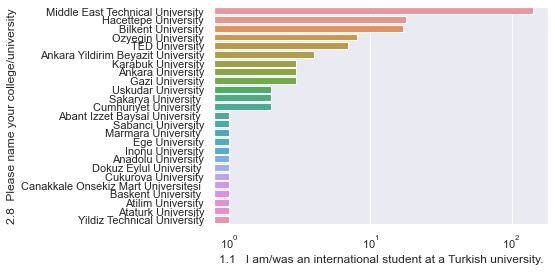

In [10]:

counts2 =df.groupby(['2.8  Please name your college/university']).count().iloc[:,:1].reset_index().sort_values(['1.1   I am/was an international student at a Turkish university.'],ascending=False)
sns.set_theme()
sns.barplot(data=counts2, y="2.8  Please name your college/university", x="1.1   I am/was an international student at a Turkish university.", orient='h', log=True)

<AxesSubplot:>

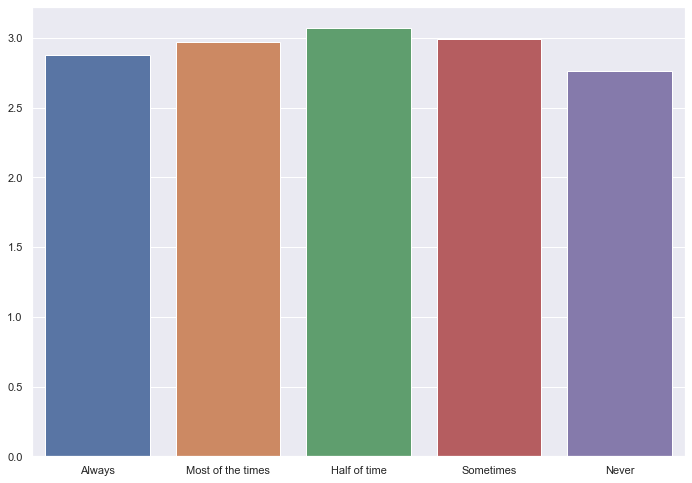

In [11]:
bar_data={'Always':2.88,  'Most of the times':2.97,'Half of time':3.069,'Sometimes':2.99,'Never':2.76}
sns.set_theme()

x1 = list(bar_data.keys())
y1 = list(bar_data.values())
sns.set(font_scale=5)
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.barplot( x=x1, y=y1)

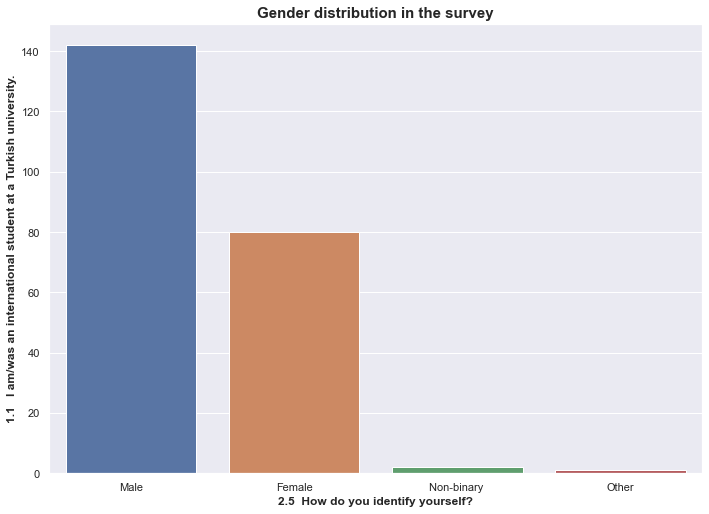

In [12]:

counts1 =df.groupby(['2.5  How do you identify yourself?']).count().iloc[:,:1].reset_index().sort_values(['1.1   I am/was an international student at a Turkish university.'],ascending=False)



sns.set_theme()
plt.rcParams["axes.labelsize"] = 15
sns.color_palette("light:#5A9", as_cmap=True)
sns.set(font_scale=5)
sns.set(rc={'figure.figsize':(11.7,8.27)})

ax= sns.barplot(data=counts1, x="2.5  How do you identify yourself?", y="1.1   I am/was an international student at a Turkish university.")
ax.set_xlabel(ax.get_xlabel(), fontdict={'weight': 'bold'})
ax.set_ylabel(ax.get_ylabel(), fontdict={'weight': 'bold'})
ax
plt.title('Gender distribution in the survey', weight='bold').set_fontsize('15')

In [51]:
counts2['2.7   What is your level of education? - Selected Choice'] = counts2['2.7   What is your level of education? - Selected Choice'].replace(['Diploma, technical qualification'], 'Diploma')
counts2['2.7   What is your level of education? - Selected Choice'] = counts2['2.7   What is your level of education? - Selected Choice'].replace(['If other please specify'], 'Others')
counts2

,2.7 What is your level of education? - Selected Choice,1.1 I am/was an international student at a Turkish university.
4,Undergraduate,204
1,Graduate,12
3,PHD,5
0,Diploma,2
2,Others,2


[Text(0.5, 0, 'Level of Education'), Text(0, 0.5, 'Observation')]

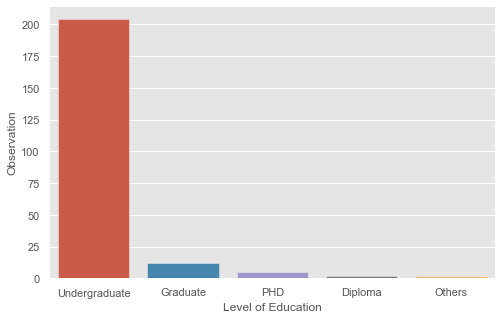

In [60]:
plt.style.use('ggplot')
plt.figure(figsize=(8,5))
sns.barplot(data=counts2, x="2.7   What is your level of education? - Selected Choice", y="1.1   I am/was an international student at a Turkish university.").set(xlabel='Level of Education', ylabel='Observation')


In [14]:
pd.crosstab(  df['2.5  How do you identify yourself?'], df['8.6   Are you satisfied with your overall experience in Turkey?'])

8.6 Are you satisfied with your overall experience in Turkey?,Extremely dissatisfied,Extremely satisfied,Neither satisfied nor dissatisfied,Somewhat dissatisfied,Somewhat satisfied
2.5 How do you identify yourself?,,,,,
Female,2,6,8,4,46
Male,2,14,21,7,86
Non-binary,0,0,1,0,0


<AxesSubplot:xlabel='2.5  How do you identify yourself?'>

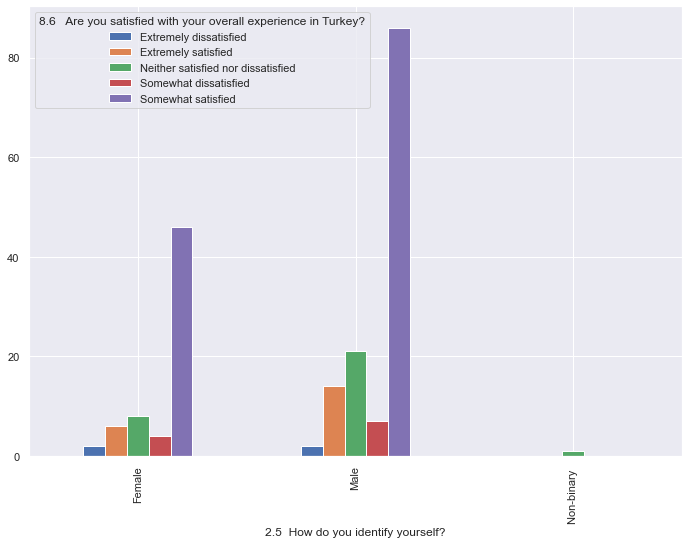

In [16]:
pd.crosstab(  df['2.5  How do you identify yourself?'], df['8.6   Are you satisfied with your overall experience in Turkey?']).plot.bar()

In [19]:
pd.crosstab(df['5.8   What were your main reasons to study in Turkey? - I found Turkey economically affordable'],df['8.6   Are you satisfied with your overall experience in Turkey?'])

8.6 Are you satisfied with your overall experience in Turkey?,Extremely dissatisfied,Extremely satisfied,Neither satisfied nor dissatisfied,Somewhat dissatisfied,Somewhat satisfied
5.8 What were your main reasons to study in Turkey? - I found Turkey economically affordable,,,,,
Moderately important,1,6,8,5,32
Not important,0,2,1,0,6
Very important,2,12,20,6,91


In [20]:
df['2.1   What is your country of citizenship?'].nunique()

37

In [24]:
bins= [0,15,20,25,30]
labels = ['0-15','15-20','20-25','25-30']
a = pd.cut(df['2.4   How old are you?'], bins=bins, labels=labels, right=False)
print (a.value_counts())

20-25    142
15-20     69
25-30      8
0-15       0
Name: 2.4   How old are you?, dtype: int64


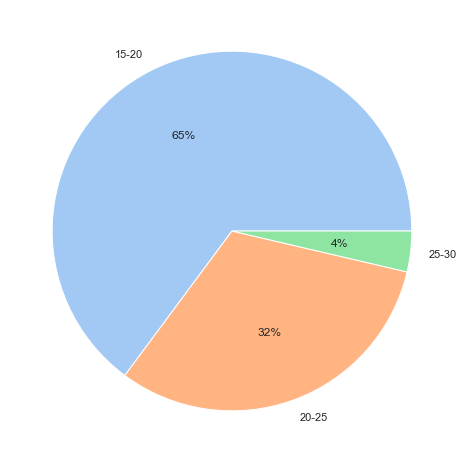

In [55]:
data = [142, 69, 8]
keys = ['15-20', '20-25', '25-30']
  
# define Seaborn color palette to use
palette_color = sns.color_palette('pastel')[0:5]
sns.set_theme()  
# plotting data on chart
plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')
  
# displaying chart
plt.show()

In [59]:
df['2.7   What is your level of education? - Selected Choice'].value_counts(normalize=True)

Undergraduate                       0.906667
Graduate                            0.053333
PHD                                 0.022222
Diploma, technical qualification    0.008889
If other please specify             0.008889
Name: 2.7   What is your level of education? - Selected Choice, dtype: float64